<a href="https://colab.research.google.com/github/skywalker0803r/deep-learning-ian-goodfellow/blob/master/Conv1d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import numpy as np
from torch import nn
import matplotlib.pyplot as plt
import torch.nn.functional as F
from sklearn.datasets import load_digits

# data

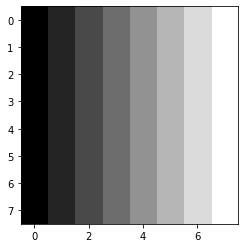

In [2]:
data = np.zeros(shape=(8,8))
for i in range(8):
  data[i] = np.array([*range(0,8,1)])
data = data.reshape(1,8,8)

img = data
plt.imshow(img[0],cmap='gray')

# model

In [0]:
class Critic(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Conv1d(8,1,kernel_size = 8)
        
    def forward(self,x):
        batch_size = x.shape[0]
        x = self.conv(x.permute(0,2,1))
        x = x.reshape(batch_size,-1)
        return F.relu(x)

In [0]:
model = Critic()

# initialize random kernel

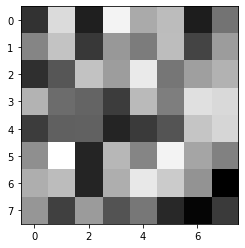

In [5]:
plt.imshow(model.conv.weight.data.numpy()[0],cmap='gray')

In [6]:
model(torch.tensor(img).float()).item()

0.3712756037712097

# learned kernel

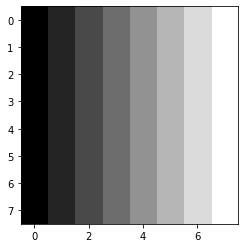

In [7]:
model.conv.weight.data.copy_(torch.tensor(img).float())
plt.imshow(model.conv.weight.data.numpy()[0],cmap='gray')

In [8]:
model(torch.tensor(img).float()).item()

783.9994506835938